Mounted at /content/gdrive
Epoch 1/35
19/19 [==============================] - 103s 5s/step - loss: 2.0094 - accuracy: 0.4935 - val_loss: 2.9967 - val_accuracy: 0.1107
Epoch 2/35
19/19 [==============================] - 97s 5s/step - loss: 1.0474 - accuracy: 0.7545 - val_loss: 2.9741 - val_accuracy: 0.2085
Epoch 3/35
19/19 [==============================] - 95s 5s/step - loss: 0.7980 - accuracy: 0.8237 - val_loss: 2.9500 - val_accuracy: 0.2443
Epoch 4/35
19/19 [==============================] - 95s 5s/step - loss: 0.6086 - accuracy: 0.8634 - val_loss: 2.9245 - val_accuracy: 0.3974
Epoch 5/35
19/19 [==============================] - 96s 5s/step - loss: 0.5174 - accuracy: 0.8885 - val_loss: 2.8935 - val_accuracy: 0.3355
Epoch 6/35
19/19 [==============================] - 96s 5s/step - loss: 0.4682 - accuracy: 0.9023 - val_loss: 2.8459 - val_accuracy: 0.2964
Epoch 7/35
19/19 [==============================] - 96s 5s/step - loss: 0.3965 - accuracy: 0.9058 - val_loss: 2.8075 - val_accuracy:

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/covid_ready/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/covid_ready/assets


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1272, 64)          22016     
_________________________________________________________________
batch_normalization (BatchNo (None, 1272, 64)          256       
_________________________________________________________________
dropout (Dropout)            (None, 1272, 64)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1272, 128)         98816     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1272, 128)         512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 1272, 128)         0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                4

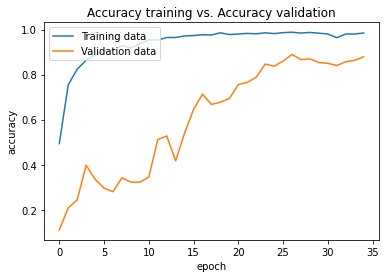

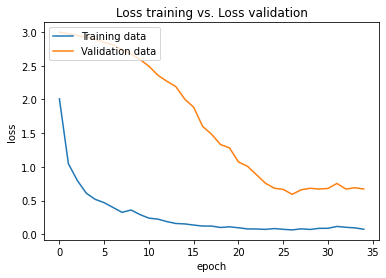

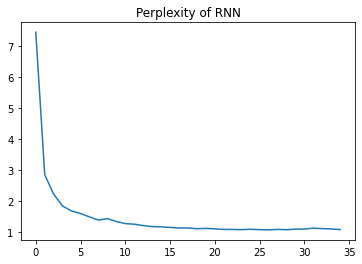

'\n\n############################################################################\n###########################  TASK III  #####################################\n\n# proteins for trial\nprotein_seq = "MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRAEKLFNQDVDAAVRGILR"\nprotein_seq2 = "MPPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKASCLY"\nprotein_seq3 = "KVFERCELARTLKRLGMDGYRGISLANWMCLAKWESGYNTRATNYNAGDR"\nprotein_seq4 = "FNASSGDSKKIVGVFYKANEYATKNPNFLGCVENALGIRDWLESQGHQYI"\nprotein_seq5 = "MDSEVQRDGRILDLIDDAWREDKLPYEDVAIPLNELPEPEQDNGGTTESV"\n\n# protein to get vocabulary\nexample_protein = "METKTLIVNGMARRLLVSPNDLLVDVLRSQLQLTSVKVGCGKGQCGACTVILDGKVVRACIIKMSRVAENASVTTLEGIGAPDCLHPLQHAWIQHGAAQCGFCTPGFIVSAKALLDENVAPSREDVRDWFQKHHNICRCTGYKPLVDAVMDAAAILRGEKTVEEISFKMPADGRIWGSSIPRPSAVAKVTGLAEFGADAALRMPENTLHLALAQAKVSHALIKGIDTSEAEKMPGVYKVLTHKDVKGKNRITGLITFPTNKGDGWERPILNDSKIFQYGDALAIVCADSEANARAAAEKVKFDLELLPEYMSAPEAMAPDAIEIHPGTPNVYYDQLEEKGEDTVPFFNDPANVVAEGSYYTQRQPHLPIEPDVGYGYINEQGQVVIHSKSVAIHLHALMIAPGLGLEFPKDLVLVQNTTGG

In [1]:
# Here we import the modules that we will use for the task
import numpy as np
import math
import statistics
import tensorflow as tf
import string
import random
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from google.colab import drive
from tensorflow.python.framework import ops
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from tensorflow.keras.layers.experimental import preprocessing


# We mount our Google Drive that contains the datasets
drive.mount('/content/gdrive')


############# the code for this class came from Google's RNN Text Generation page but has been modified to work witht he current RNN ###############
class OneStep(tf.keras.Model):
  def __init__(self, model, chars_from_ids, ids_from_chars, temperature=1.0):
    super().__init__()
    self.temperature = temperature
    self.model = model
    self.chars_from_ids = chars_from_ids
    self.ids_from_chars = ids_from_chars

    # Create a mask to prevent "[UNK]" from being generated.
    skip_ids = self.ids_from_chars(['[UNK]'])[:, None]
    sparse_mask = tf.SparseTensor(
        # Put a -inf at each bad index.
        values=[-float('inf')]*len(skip_ids),
        indices=skip_ids,
        # Match the shape to the vocabulary
        dense_shape=[len(ids_from_chars.get_vocabulary())])
    self.prediction_mask = tf.sparse.to_dense(sparse_mask)

  #@tf.function
  def generate_one_step(self, inputs):

    # Convert strings to token IDs.
    input_chars = tf.strings.unicode_split(inputs, 'UTF-8')
    input_ids = self.ids_from_chars(input_chars).to_tensor()

    # convert the input into one hot tensors
    input_ids = tf.one_hot(input_ids,21)
    input_ids = ops.convert_to_tensor(input_ids, dtype=tf.float32)


    # Run the model.
    predicted_logits = self.model(inputs=input_ids)
    
    
    # Only use the last prediction.

    predicted_logits = predicted_logits / self.temperature


    # Apply the prediction mask: prevent "[UNK]" from being generated.
    predicted_logits = predicted_logits + self.prediction_mask


    # Sample the output logits to generate token IDs.
    predicted_ids = tf.random.categorical(predicted_logits, num_samples=1)


    # Convert from token ids to characters
    predicted_chars = self.chars_from_ids(predicted_ids)
    

    # Return the characters.
    return predicted_chars



##### end of class #####





# convert made up sequence to a tensor
# line is the temp[0] pass as an argument here
def FlipChars(line):
  testlabel = []
  test = []
  temp = line.split()
  charList = list(temp)
  seq = []

  for i in range(50): # convert each letter into an int, randomly flip a char or more 
    
    # these 3 if conditions randomly flip a character letter to find dependeny, can comment out either or for experimentation
    if i == 15:
      seq.append(ord(string.ascii_uppercase[random.randint(0,26)]) - ord('A') + 1)
      continue

    if i == 25:
      seq.append(ord(string.ascii_uppercase[random.randint(0,26)]) - ord('A') + 1)
      continue

    if i >= 45:
      seq.append(ord(string.ascii_uppercase[random.randint(0,26)]) - ord('A') + 1)
      continue

    seq.append(ord(charList[i]) - ord('A') + 1)
        
  # grab the labels and convert seq into a one hot encoding of 21
  if seq[len(seq)-1] > 20:
    seq[len(seq)-1] = 20

  # get one hot tensor and test label
  label = seq[len(seq)-1]
  seq = tf.one_hot(seq,21)
  test.append(seq[:len(seq)-1])
  testlabel.append(label)

  # convert labels to tensors and one hot to a tensor again
  test_label = np.asarray(test_label).astype('float32').reshape((-1,1))
  test_label = ops.convert_to_tensor(test_label, dtype=tf.float32)
  test = ops.convert_to_tensor(seq, dtype=tf.float32)

  return test, test_label




### The function for gathering tests
def read_seqV2(sequence):
    f = open(sequence, 'r')
    test = []
    testlabel = []

    # Reading file and extracting paths and labels
    with open(sequence, 'r') as File:
      infoFile = File.readlines() # Reading all the lines from File
      count = 0
      
      for line in infoFile: #Reading line-by-line
        # get testing data
        if count % 5 == 0: # else, put it in a the training set, also known as x_train, and training label set, also known as y_train.
          temp = line.split()
          charList = list(temp[0])
          seq = []
          
          # if for some reason the protein sequence is less than 50 char long
          if len(charList) < 1273:
            '''for i in range(len(charList)):
              seq.append(ord(charList[i]) - ord('A') + 1)
            
            if seq[len(seq)-1] > 20:
               seq[len(seq)-1] = 20

            label = seq[len(seq)-1]
            
            while len(seq) < 1273:
              seq.append(0)
            
            # grab the labels and convert seq into a one hot encoding of 21
            seq = tf.one_hot(seq,21)
            test.append(seq[:len(seq)-1])
            testlabel.append(label)
            seq = []'''
            pass

          else:
            for i in range(1273): # convert each letter into an int
              seq.append(ord(charList[i]) - ord('A') + 1)
            
            # grab the labels and convert seq into a one hot encoding of 21
            if seq[len(seq)-1] > 20:
               seq[len(seq)-1] = 20

            label = seq[len(seq)-1]
            seq = tf.one_hot(seq,21)
            test.append(seq[:len(seq)-1])
            testlabel.append(label)
            seq = []

        count += 1
        
      return test, testlabel




#### The function for reading and parsing file
def read_seq(sequence):
    f = open(sequence, 'r')
    train = []
    trainlabel = []

    # Reading file and extracting paths and labels
    with open(sequence, 'r') as File:
      infoFile = File.readlines() # Reading all the lines from File
      count = 0
      
      for line in infoFile: #Reading line-by-line
        if count == 400000:
          return train, trainlabel

        # training data addin
        if count % 5 != 0: # training data found
          temp = line.split()
          charList = list(temp[0])
          seq = []
          
          # if for some reason the protein sequence is less than 50 char long
          if len(charList) < 1273:
            '''for i in range(len(charList)):
              seq.append(ord(charList[i]) - ord('A') + 1)
            
            while len(seq) < 50:
              seq.append(0)
            
            # grab the labels and convert seq into a one hot encoding of 21
            if seq[len(seq)-1] > 20:
               seq[len(seq)-1] = 20

            label = seq[len(seq)-1]
            seq = tf.one_hot(seq,21)
            train.append(seq[:len(seq)-1])
            trainlabel.append(label)
            seq = []'''
            pass

          else:
            for i in range(1273): # convert each letter into an int
              seq.append(ord(charList[i]) - ord('A') + 1)
            
            # grab the labels and convert seq into a one hot encoding of 21
            if seq[len(seq)-1] > 20:
               seq[len(seq)-1] = 20

            label = seq[len(seq)-1]
            seq = tf.one_hot(seq,21)
            train.append(seq[:len(seq)-1])
            trainlabel.append(label)
            seq = []

        count += 1



# We parse files to get training data
seq_train, train_label = read_seq('/content/gdrive/My Drive/pdb_seqres.txt')
seq_test, test_label = read_seqV2('/content/gdrive/My Drive/pdb_seqres.txt')

# We reshape labels to be 2d arrays
train_label = np.asarray(train_label).astype('float32').reshape((-1,1))
test_label = np.asarray(test_label).astype('float32').reshape((-1,1))

# We convert labels (y_train and y_test) to tensors
train_label = ops.convert_to_tensor(train_label, dtype=tf.float32)
test_label = ops.convert_to_tensor(test_label, dtype=tf.float32)

# We make the training and testing tensors floats instead of ints
seq_train = ops.convert_to_tensor(seq_train, dtype=tf.float32)
seq_test = ops.convert_to_tensor(seq_test, dtype=tf.float32)

# We create out recurrent neural network (RNN) 
# low dropout == better accuracy
model = keras.Sequential(
    [
     layers.LSTM(64, return_sequences=True, activation='relu'), # LSTM layer
     layers.BatchNormalization(), 
     layers.Dropout(0.1),
     layers.LSTM(128, return_sequences=True, kernel_initializer='glorot_uniform', activation='tanh', bias_initializer='zeros'), # This is the LSTM layer with weights initialized
     layers.BatchNormalization(),
     layers.Dropout(0.2),
     layers.LSTM(64, return_sequences=False, activation='tanh'), # LSTM layer
     layers.BatchNormalization(), 
     layers.Dropout(0.3),
     layers.Dense(21, activation='softmax') # Output layer
    ]
)

"""
For extra credit portion - testing
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=1000,
    decay_rate=0.9)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)

Optimizer.apply_gradients(
    grads_and_vars, name=None, experimental_aggregate_gradients=True
)
"""

# We compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# We get the history of the model to plot stuff
historyMod = model.fit(x=seq_train, y=train_label, epochs=35, batch_size=64, validation_data=(seq_test, test_label))


# save the model
model.save('/content/gdrive/My Drive/covid_ready')

# We print out a summary of our model
model.summary()

# We plot results of the training model
plt.plot(historyMod.history['accuracy'], label='Training data')
plt.plot(historyMod.history['val_accuracy'], label='Validation data')
plt.title('Accuracy training vs. Accuracy validation')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc="upper left")
plt.show()

# We plot the loss
plt.plot(historyMod.history['loss'], label='Training data')
plt.plot(historyMod.history['val_loss'], label='Validation data')
plt.title('Loss training vs. Loss validation')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc="upper left")
plt.show()

# This portion takes care of the perplexity plotting
perplexity = tf.exp(historyMod.history['loss'])
plt.plot(perplexity)
plt.title('Perplexity of RNN')
plt.show()

'''

############################################################################
###########################  TASK III  #####################################

# proteins for trial
protein_seq = "MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRAEKLFNQDVDAAVRGILR"
protein_seq2 = "MPPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKASCLY"
protein_seq3 = "KVFERCELARTLKRLGMDGYRGISLANWMCLAKWESGYNTRATNYNAGDR"
protein_seq4 = "FNASSGDSKKIVGVFYKANEYATKNPNFLGCVENALGIRDWLESQGHQYI"
protein_seq5 = "MDSEVQRDGRILDLIDDAWREDKLPYEDVAIPLNELPEPEQDNGGTTESV"

# protein to get vocabulary
example_protein = "METKTLIVNGMARRLLVSPNDLLVDVLRSQLQLTSVKVGCGKGQCGACTVILDGKVVRACIIKMSRVAENASVTTLEGIGAPDCLHPLQHAWIQHGAAQCGFCTPGFIVSAKALLDENVAPSREDVRDWFQKHHNICRCTGYKPLVDAVMDAAAILRGEKTVEEISFKMPADGRIWGSSIPRPSAVAKVTGLAEFGADAALRMPENTLHLALAQAKVSHALIKGIDTSEAEKMPGVYKVLTHKDVKGKNRITGLITFPTNKGDGWERPILNDSKIFQYGDALAIVCADSEANARAAAEKVKFDLELLPEYMSAPEAMAPDAIEIHPGTPNVYYDQLEEKGEDTVPFFNDPANVVAEGSYYTQRQPHLPIEPDVGYGYINEQGQVVIHSKSVAIHLHALMIAPGLGLEFPKDLVLVQNTTGGTFGYKFSPTMEALVGVAVMATGRPCHLRYNYEQQQNYTGKRSPFWTTMRYAADRQGKILAMETDWSVDHGPYSEFGDLLTLRGAQYIGAGYGIANIRGTGRTVATNHCWGAAFRGYGAPESEFPSEVLMDELAEKLGMDPFELRALNCYREGDTTSSGQIPEVMSLPEMFDKMRPYYEESKKRVKERSTAEIKRGVGVALGVYGAGLDGPDTSEAWVELNDDGSVTLGNSWEDHGQGADAGSLGTAHEALRPLGITPENIHLVMNDTSKTPNSGPAGGSRSQVVTGNAIRVACEMLIEGMRKPGGGFFTPAEMKAEGRPMRYDGKWTAPAKDCDAKGQGSPFACYMYGLFLTEVAVEVATGKATVEKMVCVADIGKICNKLVVDGQIYGGLAQGVGLALSEDYEDLKKHSTMGGAGIPSIKMIPDDIEIVYVETPRKDGPFGASGVGEMPLTAPHAAIINGIYNACGARVRHLPARPEKVLEAMPR"

# getting the vocabulary of the protein sequence as well as their associated IDs
vocab = sorted(set(example_protein))
ids_from_chars = preprocessing.StringLookup(vocabulary=list(vocab), mask_token=None)
chars_from_ids = tf.keras.layers.experimental.preprocessing.StringLookup(vocabulary=ids_from_chars.get_vocabulary(), invert=True, mask_token=None)

# get the one step modelclass initialized so prediction can be performed
one_step_model = OneStep(model, chars_from_ids, ids_from_chars)


# preparing trials
trials = 1
k = 1
i = 0
array_of_proteins = []
array_of_proteins.append(protein_seq)
array_of_proteins.append(protein_seq2)
array_of_proteins.append(protein_seq3)
array_of_proteins.append(protein_seq4)
array_of_proteins.append(protein_seq5)



#array_of_proteins = np.array(array_of_proteins)

# beginning trials
while trials < 6:
  print("\nBeginning trial " + str(trials))
  print("===============================================================")
  print("===============================================================\n")
  ar = array_of_proteins[i]

  while k != 20:
    chars = ar[:k]
    next_char = tf.constant([chars])
    result = []
    result.append(chars)
    next_letter = []

    for n in range(350-k):
      next_letter = one_step_model.generate_one_step(next_char)
      next_letter_np = next_letter.numpy()
      result.append(next_letter_np[0])

    print("When k = " + str(k))
    print("-"*len(result))
    #k += 1

    print("\n-----------Finding matches-----------\n")
    print("Prediction with seed of " + str(k))
    matches = 0
    checkMatches = ar[k:]
    k += 1

    for x in range(len(checkMatches)):
      if checkMatches[x].encode("utf-8") == result[x]:
        matches += 1
      else:
        continue

    print(str(matches) + " matches")
    print("________________________\n")
    print("\n")

  # end of for loop and going on to the next rial  
  i += 1
  k = 1
  trials += 1 

print("\n End of trials.")'''

